#Data Pre-Processing & EDA

In [ ]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Additional Libraries
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Data/Train_Dataset.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0


In [ ]:
#Shape of dataframe
print(" Shape of training dataframe: ", df.shape)

 Shape of training dataframe:  (121856, 40)


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [ ]:
print(df.describe(include='all'))

                  ID Client_Income      Car_Owned     Bike_Owned    Active_Loan      House_Own    Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type Client_Housing_Type Population_Region_Relative Age_Days Employed_Days Registration_Days ID_Days  Own_House_Age     Mobile_Tag  Homephone_Tag  Workphone_Working Client_Occupation  Client_Family_Members  Cleint_City_Rating  Application_Process_Day  Application_Process_Hour Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  Score_Source_1  Score_Source_2 Score_Source_3  Social_Circle_Default   Phone_Change  Credit_Bureau        Default
count   1.218560e+05        118249  118275.000000  118232.000000  118221.000000  118195.000000  118218.000000        118224       117044           120110             118155           118211                118383        119443             118205              118169                     116999  

In [ ]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                            Missing Values  Percentage
ID                                       0    0.000000
Client_Income                         3607    2.960051
Car_Owned                             3581    2.938715
Bike_Owned                            3624    2.974002
Active_Loan                           3635    2.983029
House_Own                             3661    3.004366
Child_Count                           3638    2.985491
Credit_Amount                         3632    2.980567
Loan_Annuity                          4812    3.948923
Accompany_Client                      1746    1.432839
Client_Income_Type                    3701    3.037191
Client_Education                      3645    2.991236
Client_Marital_Status                 3473    2.850085
Client_Gender                         2413    1.980206
Loan_Contract_Type                    3651    2.996159
Client_Housing_Type                   3687    3.025702
Population_Region_Relative            4857    3.985852
Age_Days  

In [ ]:
#check all the distinguished features of the dataset
df.select_dtypes(include='object').nunique()

,0
Client_Income,1217
Credit_Amount,4176
Loan_Annuity,10858
Accompany_Client,7
Client_Income_Type,8
Client_Education,5
Client_Marital_Status,4
Client_Gender,3
Loan_Contract_Type,2
Client_Housing_Type,6


In [ ]:
class_df = df.groupby('Default').count()['ID'].reset_index().sort_values(by='ID',ascending=False)
class_df.style.background_gradient(cmap='winter')

,Default,ID
0,0,112011
1,1,9845


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print(numerical_columns.columns)

Index(['ID', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Default'], dtype='object')


In [ ]:
df.select_dtypes(include=['int64', 'float64']).nunique()

,0
ID,121856
Car_Owned,2
Bike_Owned,2
Active_Loan,2
House_Own,2
Child_Count,14
Own_House_Age,55
Mobile_Tag,2
Homephone_Tag,2
Workphone_Working,2


In [ ]:
object_columns = df.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_3'], dtype='object')


In [ ]:
df.select_dtypes(include=['object']).nunique()

,0
Client_Income,1217
Credit_Amount,4176
Loan_Annuity,10858
Accompany_Client,7
Client_Income_Type,8
Client_Education,5
Client_Marital_Status,4
Client_Gender,3
Loan_Contract_Type,2
Client_Housing_Type,6


In [ ]:
# Define the columns that need to be cleaned and converted
columns_to_clean_and_convert = {
    'Client_Income': 'float64',
    'Car_Owned': 'int64',
    'Bike_Owned': 'int64',
    'Active_Loan': 'int64',
    'House_Own': 'int64',
    'Child_Count': 'int64',
    'Credit_Amount': 'float64',
    'Loan_Annuity': 'float64',
    'Population_Region_Relative': 'float64',
    'Age_Days': 'int64',
    'Employed_Days': 'int64',
    'Registration_Days': 'int64',
    'ID_Days': 'int64',
    'Own_House_Age': 'int64',
    'Client_Family_Members': 'int64',
    'Cleint_City_Rating': 'int64',
    'Application_Process_Day': 'int64',
    'Application_Process_Hour': 'int64',
    'Score_Source_3': 'float64',
    'Social_Circle_Default': 'float64',
    'Phone_Change': 'int64',
    'Credit_Bureau': 'int64'
}

# Function to clean and convert to the specified data type
def clean_and_convert_column(df, column, target_dtype):
    # Remove non-numeric characters (except '.' and '-' for float values)
    df[column] = df[column].astype(str).str.replace('[^0-9.-]', '', regex=True)

    # Convert to the specified data type (float or int)
    if target_dtype == 'float64':
        df[column] = pd.to_numeric(df[column], errors='coerce')
    elif target_dtype == 'int64':
        # If converting to int, ensure it is first converted to numeric, then int64
        df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')  # Use 'Int64' to handle NaNs in integer columns

# Apply the cleaning and conversion process for each column
for column, dtype in columns_to_clean_and_convert.items():
    clean_and_convert_column(df, column, dtype)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  Int64  
 3   Bike_Owned                  118232 non-null  Int64  
 4   Active_Loan                 118221 non-null  Int64  
 5   House_Own                   118195 non-null  Int64  
 6   Child_Count                 118218 non-null  Int64  
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [ ]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0,0,1,0,0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,<NA>,1,1,0,Sales,2,2,6,17,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63,<NA>,0
1,12138936,20250.0,1,0,1,<NA>,0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0,1,0,1,NaN,2,2,3,10,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,<NA>,<NA>,0
2,12181264,18000.0,0,0,1,0,1,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790,5102,<NA>,331,<NA>,1,0,0,Realty agents,2,2,4,<NA>,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277,0,0
3,12188929,15750.0,0,0,1,1,0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,<NA>,775,<NA>,1,0,0,NaN,2,3,2,15,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700,3,0
4,12133385,33750.0,1,0,1,0,2,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6,1,0,0,Laborers,4,1,3,<NA>,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674,1,0


In [ ]:
df.describe()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,1.182340e+05,118275.0,118232.0,118221.0,118195.0,118218.0,118219.000000,117030.000000,116988.000000,118239.0,118190.0,118225.0,115871.0,41761.0,121856.000000,121856.000000,121856.000000,119446.0,119447.0,119428.0,118193.0,53021.000000,116170.000000,94934.000000,59928.000000,118192.0,103316.0,121856.000000
mean,1.216093e+07,1.686519e+04,0.342854,0.332262,0.499175,0.69206,0.417779,60046.488951,2721.254492,0.022602,16027.422948,67154.070615,4975.162123,2987.471015,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.0631,0.501213,0.518625,0.511180,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,1.153815e+04,0.474665,0.471026,0.500001,0.461644,0.728802,40350.663346,1461.466162,0.413617,4366.356504,138971.782951,3514.546963,1511.884576,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.194333,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,2.565000e+03,0.0,0.0,0.0,0.0,0.0,4500.000000,217.350000,0.000533,7676.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.014568,0.000005,0.000527,0.000000,0.0,0.0,0.000000
25%,1.213046e+07,1.125000e+04,0.0,0.0,0.0,0.0,0.0,27000.000000,1657.350000,0.010006,12398.0,932.0,2008.0,1705.0,5.0,1.000000,0.000000,0.000000,2.0,2.0,2.0,10.0,0.333481,0.390164,0.372334,0.057700,272.0,0.0,0.000000
50%,1.216093e+07,1.440000e+04,0.0,0.0,0.0,1.0,0.0,51750.000000,2499.750000,0.018850,15734.0,2212.0,4493.0,3242.0,9.0,1.000000,0.000000,0.000000,2.0,2.0,3.0,12.0,0.504657,0.564978,0.537070,0.088700,755.0,1.0,0.000000
75%,1.219139e+07,2.025000e+04,1.0,1.0,1.0,1.0,1.0,80865.000000,3466.800000,0.028663,19661.0,5634.0,7464.0,4295.0,15.0,1.000000,0.000000,1.000000,3.0,2.0,5.0,14.0,0.673890,0.664011,0.667458,0.148500,1570.0,3.0,0.000000
max,1.222186e+07,1.800009e+06,1.0,1.0,1.0,1.0,19.0,405000.000000,22500.000000,100.000000,25201.0,365243.0,23738.0,7197.0,69.0,1.000000,1.000000,1.000000,16.0,3.0,6.0,23.0,0.945741,100.000000,0.896010,1.000000,4185.0,22.0,1.000000


In [ ]:
# Display the dimensions (number of rows and columns) of the DataFrame
df.shape

(121856, 40)

In [ ]:
# Count the total number of duplicate rows in the DataFrame
df.duplicated().sum()

0

<Axes: >

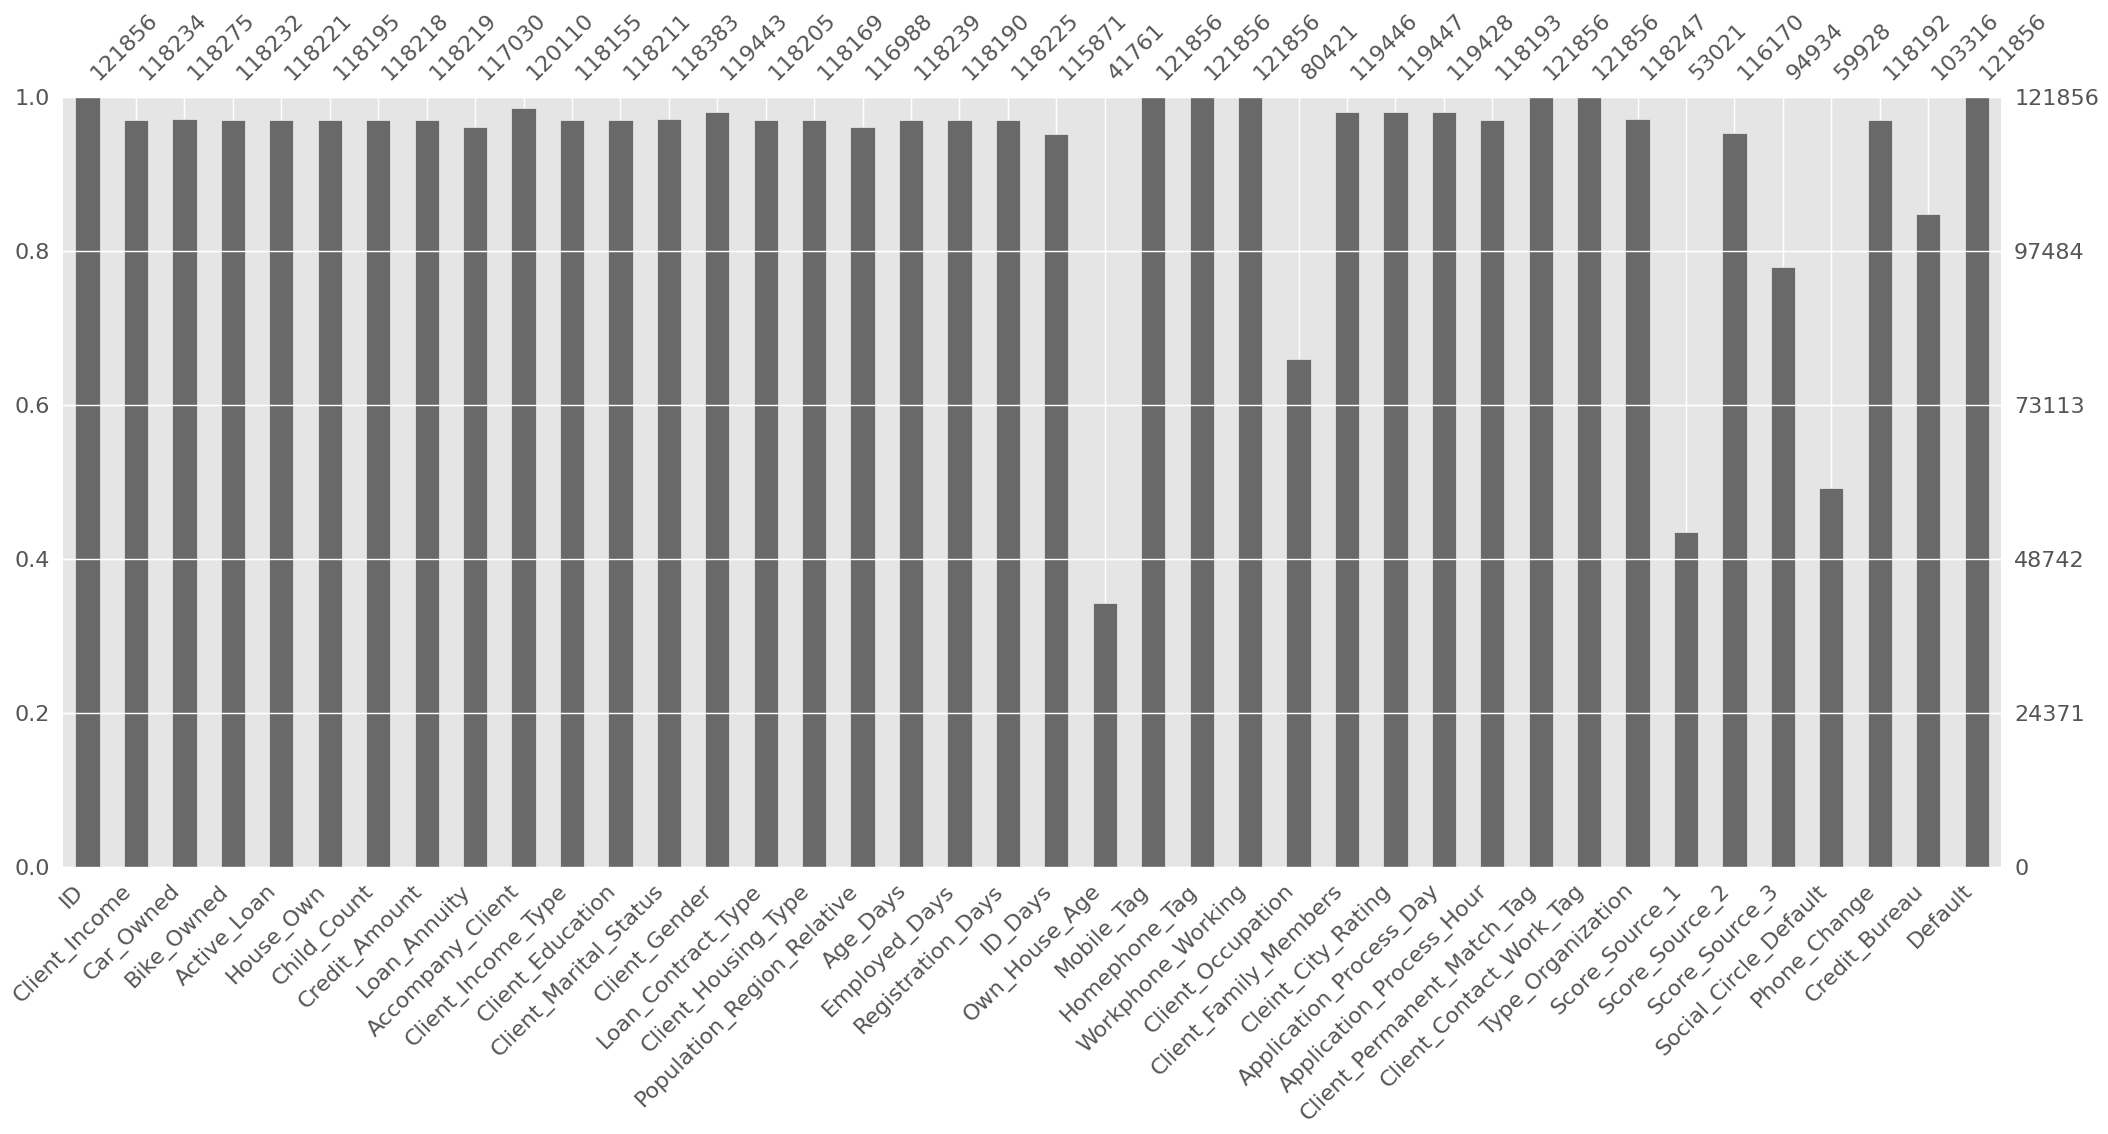

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
#These columns exceed the 30% threshold, so you can use the following code to drop them
columns_to_drop = ['Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Social_Circle_Default']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# List of columns to drop
manual_columns_to_drop = [
    'ID', 'Accompany_Client', 'Registration_Days',
    'Mobile_Tag', 'Homephone_Tag', 'Application_Process_Day',
    'Application_Process_Hour','Client_Permanent_Match_Tag','Client_Contact_Work_Tag', 'Type_Organization',
    'Score_Source_2', 'Score_Source_3',
    'Phone_Change','Credit_Bureau','Client_Housing_Type','Population_Region_Relative','ID_Days','Cleint_City_Rating'
]

# Drop the specified columns
df.drop(columns=manual_columns_to_drop, inplace=True)

In [ ]:
# Display the dimensions (number of rows and columns) of the DataFrame
df.shape

(121856, 18)

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 5870


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Client_Income          118234 non-null  float64
 1   Car_Owned              118275 non-null  Int64  
 2   Bike_Owned             118232 non-null  Int64  
 3   Active_Loan            118221 non-null  Int64  
 4   House_Own              118195 non-null  Int64  
 5   Child_Count            118218 non-null  Int64  
 6   Credit_Amount          118219 non-null  float64
 7   Loan_Annuity           117030 non-null  float64
 8   Client_Income_Type     118155 non-null  object 
 9   Client_Education       118211 non-null  object 
 10  Client_Marital_Status  118383 non-null  object 
 11  Client_Gender          119443 non-null  object 
 12  Loan_Contract_Type     118205 non-null  object 
 13  Age_Days               118239 non-null  Int64  
 14  Employed_Days          118190 non-nu

In [ ]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Workphone_Working,Client_Family_Members,Default
0,6750.0,0,0,1,0,0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,13957,1062,0,2,0
1,20250.0,1,0,1,<NA>,0,15282.00,1826.55,Service,Graduation,M,Male,CL,14162,4129,1,2,0
2,18000.0,0,0,1,0,1,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,16790,5102,0,2,0
3,15750.0,0,0,1,1,0,53870.40,2295.45,Retired,Secondary,M,Male,CL,23195,365243,0,2,0
4,33750.0,1,0,1,0,2,133988.40,3547.35,Commercial,Secondary,M,Female,CL,11366,2977,0,4,0


In [ ]:
df.tail()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Workphone_Working,Client_Family_Members,Default
121851,29250.0,0,0,<NA>,1,0,107820.00,3165.30,Service,Secondary,M,Female,CL,12889,2863,0,2,1
121852,15750.0,0,1,1,0,0,104256.00,3388.05,Commercial,Graduation,M,Female,CL,8648,636,0,2,0
121853,8100.0,0,1,0,1,1,55107.90,2989.35,Govt Job,Secondary,M,Male,CL,9152,1623,0,3,0
121854,38250.0,1,1,0,1,0,45000.00,2719.35,Service,Graduation,M,Female,CL,10290,847,0,2,0
121855,9000.0,1,1,1,1,1,62428.95,4201.65,Commercial,Secondary,S,Male,CL,14772,498,0,2,0


In [ ]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                    3622    2.972361
Car_Owned                        3581    2.938715
Bike_Owned                       3624    2.974002
Active_Loan                      3635    2.983029
House_Own                        3661    3.004366
Child_Count                      3638    2.985491
Credit_Amount                    3637    2.984670
Loan_Annuity                     4826    3.960412
Client_Income_Type               3701    3.037191
Client_Education                 3645    2.991236
Client_Marital_Status            3473    2.850085
Client_Gender                    2413    1.980206
Loan_Contract_Type               3651    2.996159
Age_Days                         3617    2.968258
Employed_Days                    3666    3.008469
Workphone_Working                   0    0.000000
Client_Family_Members            2410    1.977744
Default                             0    0.000000


In [ ]:
# Step 1: Convert empty strings and cells with only `$` to NaN
df['Client_Income'] = df['Client_Income'].replace({'': pd.NA, '$': pd.NA})

# Step 2: Remove dollar signs and commas from valid numeric values
df['Client_Income'] = df['Client_Income'].replace({'\$': '', ',': ''}, regex=True)

# Step 3: Convert the column to numeric
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')

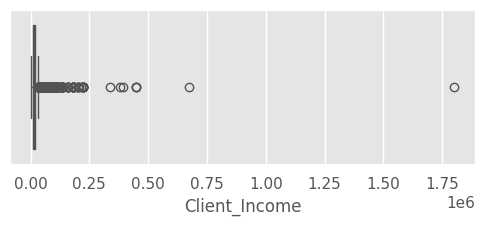

In [ ]:
# Draw the boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Client_Income'])
plt.show()

In [ ]:
# Step 1: Convert empty strings and cells with only `$` to NaN
df['Credit_Amount'] = df['Credit_Amount'].replace({'': pd.NA, '$': pd.NA})

# Step 2: Remove dollar signs and commas from valid numeric values
df['Credit_Amount'] = df['Credit_Amount'].replace({'\$': '', ',': ''}, regex=True)

# Step 3: Convert the column to numeric
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')

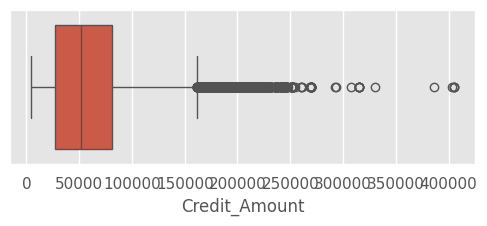

In [ ]:
# Draw the boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Credit_Amount'])
plt.show()

In [ ]:
# Step 1: Convert empty strings and cells with only `$` to NaN
df['Loan_Annuity'] = df['Loan_Annuity'].replace({'': pd.NA, '$': pd.NA, '#VALUE!':pd.NA})

# Step 2: Remove dollar signs and commas from valid numeric values
df['Loan_Annuity'] = df['Loan_Annuity'].replace({'\$': '', ',': ''}, regex=True)

# Step 3: Convert the column to numeric
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')

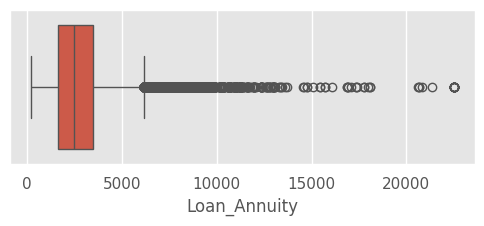

In [ ]:
# Draw the boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Loan_Annuity'])
plt.show()

In [ ]:
# Convert blanks to NaN for specified columns
columns_to_clean = ['Bike_Owned', 'Car_Owned', 'Active_Loan', 'House_Own']
df[columns_to_clean] = df[columns_to_clean].replace('', pd.NA)

In [ ]:
# Replace 'NA' and blanks with NaN in the Child_Count column
df['Child_Count'] = df['Child_Count'].replace(['NA', ''], pd.NA)

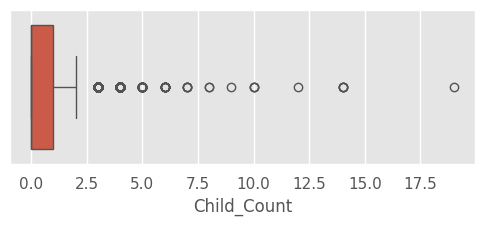

In [ ]:
# Draw the boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Child_Count'])
plt.show()

In [ ]:
# Convert Age_Days and Employed_Days to years and round to nearest integer
df['Age_Years'] = (df['Age_Days'] / 365).round().astype('Int64')  # Keep as Int64 to handle NaN
df['Employed_Years'] = (df['Employed_Days'] / 365).round().astype('Int64')  # Same here

# Drop the original columns if no longer needed (optional)
df.drop(columns=['Age_Days', 'Employed_Days'], inplace=True)

In [ ]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                    3622    2.972361
Car_Owned                        3581    2.938715
Bike_Owned                       3624    2.974002
Active_Loan                      3635    2.983029
House_Own                        3661    3.004366
Child_Count                      3638    2.985491
Credit_Amount                    3637    2.984670
Loan_Annuity                     4826    3.960412
Client_Income_Type               3701    3.037191
Client_Education                 3645    2.991236
Client_Marital_Status            3473    2.850085
Client_Gender                    2413    1.980206
Loan_Contract_Type               3651    2.996159
Workphone_Working                   0    0.000000
Client_Family_Members            2410    1.977744
Default                             0    0.000000
Age_Years                        3617    2.968258
Employed_Years                   3666    3.008469


In [ ]:
# Fill null values with the median for specific columns
df['Client_Income'].fillna(df['Client_Income'].median(), inplace=True)
df['Child_Count'].fillna(df['Child_Count'].median(), inplace=True)
df['Credit_Amount'].fillna(df['Credit_Amount'].median(), inplace=True)
df['Loan_Annuity'].fillna(df['Loan_Annuity'].median(), inplace=True)
df['Client_Family_Members'].fillna(df['Client_Family_Members'].median(), inplace=True)
df['Age_Years'].fillna(df['Age_Years'].median(), inplace=True)
df['Employed_Years'].fillna(df['Employed_Years'].median(), inplace=True)

In [ ]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                       0    0.000000
Car_Owned                        3581    2.938715
Bike_Owned                       3624    2.974002
Active_Loan                      3635    2.983029
House_Own                        3661    3.004366
Child_Count                         0    0.000000
Credit_Amount                       0    0.000000
Loan_Annuity                        0    0.000000
Client_Income_Type               3701    3.037191
Client_Education                 3645    2.991236
Client_Marital_Status            3473    2.850085
Client_Gender                    2413    1.980206
Loan_Contract_Type               3651    2.996159
Workphone_Working                   0    0.000000
Client_Family_Members               0    0.000000
Default                             0    0.000000
Age_Years                           0    0.000000
Employed_Years                      0    0.000000


In [ ]:
# Replace 'NA' and blanks with NaN in the Child_Count column
df['Client_Gender'] = df['Client_Gender'].replace(['XNA', ''], pd.NA)

In [ ]:
# List of categorical columns to fill with mode
categorical_columns = [
    'Client_Income_Type',
    'Client_Education',
    'Client_Marital_Status',
    'Client_Gender',
    'Loan_Contract_Type'
]

# Fill missing values with the mode for each column
for column in categorical_columns:
    mode_value = df[column].mode()[0]  # Get the mode
    df[column].fillna(mode_value, inplace=True)  # Fill blanks with the mode

In [ ]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                       0    0.000000
Car_Owned                        3581    2.938715
Bike_Owned                       3624    2.974002
Active_Loan                      3635    2.983029
House_Own                        3661    3.004366
Child_Count                         0    0.000000
Credit_Amount                       0    0.000000
Loan_Annuity                        0    0.000000
Client_Income_Type                  0    0.000000
Client_Education                    0    0.000000
Client_Marital_Status               0    0.000000
Client_Gender                       0    0.000000
Loan_Contract_Type                  0    0.000000
Workphone_Working                   0    0.000000
Client_Family_Members               0    0.000000
Default                             0    0.000000
Age_Years                           0    0.000000
Employed_Years                      0    0.000000


In [ ]:
binary_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own']

for column in binary_columns:
    mode_value = df[column].mode()[0]  # Get the mode
    df[column].fillna(mode_value, inplace=True)  # Fill blanks with the mode

In [ ]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                       0         0.0
Car_Owned                           0         0.0
Bike_Owned                          0         0.0
Active_Loan                         0         0.0
House_Own                           0         0.0
Child_Count                         0         0.0
Credit_Amount                       0         0.0
Loan_Annuity                        0         0.0
Client_Income_Type                  0         0.0
Client_Education                    0         0.0
Client_Marital_Status               0         0.0
Client_Gender                       0         0.0
Loan_Contract_Type                  0         0.0
Workphone_Working                   0         0.0
Client_Family_Members               0         0.0
Default                             0         0.0
Age_Years                           0         0.0
Employed_Years                      0         0.0


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 8873


In [ ]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Workphone_Working,Client_Family_Members,Default,Age_Years,Employed_Years
0,6750.0,0,0,1,0,0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,0,2,0,38,3
1,20250.0,1,0,1,1,0,15282.00,1826.55,Service,Graduation,M,Male,CL,1,2,0,39,11
2,18000.0,0,0,1,0,1,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,0,2,0,46,14
3,15750.0,0,0,1,1,0,53870.40,2295.45,Retired,Secondary,M,Male,CL,0,2,0,64,1001
4,33750.0,1,0,1,0,2,133988.40,3547.35,Commercial,Secondary,M,Female,CL,0,4,0,31,8


In [ ]:
df.tail()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Workphone_Working,Client_Family_Members,Default,Age_Years,Employed_Years
121851,29250.0,0,0,0,1,0,107820.00,3165.30,Service,Secondary,M,Female,CL,0,2,1,35,8
121852,15750.0,0,1,1,0,0,104256.00,3388.05,Commercial,Graduation,M,Female,CL,0,2,0,24,2
121853,8100.0,0,1,0,1,1,55107.90,2989.35,Govt Job,Secondary,M,Male,CL,0,3,0,25,4
121854,38250.0,1,1,0,1,0,45000.00,2719.35,Service,Graduation,M,Female,CL,0,2,0,28,2
121855,9000.0,1,1,1,1,1,62428.95,4201.65,Commercial,Secondary,S,Male,CL,0,2,0,40,1


In [ ]:
# Remove outliers in 'Client_Income' using IQR
Q1 = df['Client_Income'].quantile(0.25)
Q3 = df['Client_Income'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Client_Income'] < (Q1 - 1.5 * IQR)) | (df['Client_Income'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Remove outliers in 'Credit_Amount' using IQR
Q1 = df['Credit_Amount'].quantile(0.25)
Q3 = df['Credit_Amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Credit_Amount'] < (Q1 - 1.5 * IQR)) | (df['Credit_Amount'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Remove outliers in 'Loan_Annuity' using IQR
Q1 = df['Loan_Annuity'].quantile(0.25)
Q3 = df['Loan_Annuity'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Loan_Annuity'] < (Q1 - 1.5 * IQR)) | (df['Loan_Annuity'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Remove outliers in 'Client_Family_Members' using IQR
Q1 = df['Client_Family_Members'].quantile(0.25)
Q3 = df['Client_Family_Members'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Client_Family_Members'] < (Q1 - 1.5 * IQR)) | (df['Client_Family_Members'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Remove outliers in 'Age_Years' using IQR
Q1 = df['Age_Years'].quantile(0.25)
Q3 = df['Age_Years'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age_Years'] < (Q1 - 1.5 * IQR)) | (df['Age_Years'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Remove outliers in 'Employed_Years ' using IQR
Q1 = df['Employed_Years'].quantile(0.25)
Q3 = df['Employed_Years'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Employed_Years'] < (Q1 - 1.5 * IQR)) | (df['Employed_Years'] > (Q3 + 1.5 * IQR)))]

In [ ]:
df.shape

(89954, 18)

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 6495


In [ ]:
# Count the occurrences where Child_Count is greater than Client_Family_Members
total_occurrences = (df['Child_Count'] > df['Client_Family_Members']).sum()

# Print the total number of occurrences
print("Total occurrences where Child_Count > Client_Family_Members:", total_occurrences)

# Remove the rows where Child_Count is greater than Client_Family_Members
df = df[df['Child_Count'] <= df['Client_Family_Members']]

# Verify that the rows have been removed
print("Rows after removal:", df.shape[0])

Total occurrences where Child_Count > Client_Family_Members: 37
Rows after removal: 89917


In [ ]:
# Count the occurrences where Employed_Years is greater than Age_Years
total_occurrences_employed = (df['Employed_Years'] > df['Age_Years']).sum()
print("Total occurrences where Employed_Years > Age_Years:", total_occurrences_employed)

# Remove the rows where Employed_Years is greater than Age_Years
df = df[df['Employed_Years'] <= df['Age_Years']]

# Verify that the rows have been removed
print("Rows after removal:", df.shape[0])

Total occurrences where Employed_Years > Age_Years: 0
Rows after removal: 89917


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89917 entries, 0 to 121855
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Income          89917 non-null  float64
 1   Car_Owned              89917 non-null  Int64  
 2   Bike_Owned             89917 non-null  Int64  
 3   Active_Loan            89917 non-null  Int64  
 4   House_Own              89917 non-null  Int64  
 5   Child_Count            89917 non-null  Int64  
 6   Credit_Amount          89917 non-null  float64
 7   Loan_Annuity           89917 non-null  float64
 8   Client_Income_Type     89917 non-null  object 
 9   Client_Education       89917 non-null  object 
 10  Client_Marital_Status  89917 non-null  object 
 11  Client_Gender          89917 non-null  object 
 12  Loan_Contract_Type     89917 non-null  object 
 13  Workphone_Working      89917 non-null  int64  
 14  Client_Family_Members  89917 non-null  Int64  
 15  Defaul

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicates again to confirm removal
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")

Number of duplicate rows after removal: 0


In [ ]:
df.shape

(83422, 18)

In [ ]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Workphone_Working,Client_Family_Members,Default,Age_Years,Employed_Years
0,6750.0,0,0,1,0,0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,0,2,0,38,3
1,20250.0,1,0,1,1,0,15282.00,1826.55,Service,Graduation,M,Male,CL,1,2,0,39,11
2,18000.0,0,0,1,0,1,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,0,2,0,46,14
4,33750.0,1,0,1,0,2,133988.40,3547.35,Commercial,Secondary,M,Female,CL,0,4,0,31,8
5,11250.0,0,1,1,1,1,13752.00,653.85,Service,Secondary,W,Female,CL,0,2,0,38,3


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-hot encoding
df = pd.get_dummies(df, columns=['Client_Income_Type', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type'], drop_first=False)

# Label encoding for Client_Education
label_encoder = LabelEncoder()
df['Client_Education'] = label_encoder.fit_transform(df['Client_Education'])

# Convert boolean columns to 1 and 0 if necessary (for completeness)
boolean_columns = df.select_dtypes(include='bool').columns  # Select boolean columns
df[boolean_columns] = df[boolean_columns].astype(int)

# Check the result
print(df.head())

   Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  Credit_Amount  Loan_Annuity  Client_Education  Workphone_Working  Client_Family_Members  Default  Age_Years  Employed_Years  Client_Income_Type_Commercial  Client_Income_Type_Govt Job  Client_Income_Type_Maternity leave  Client_Income_Type_Retired  Client_Income_Type_Service  Client_Income_Type_Student  Client_Marital_Status_D  Client_Marital_Status_M  Client_Marital_Status_S  Client_Marital_Status_W  Client_Gender_Female  Client_Gender_Male  Loan_Contract_Type_CL  Loan_Contract_Type_RL
0         6750.0          0           0            1          0            0       61190.55       3416.85                 4                  0                      2        0         38               3                              1                            0                                   0                           0                           0                           0                        0                        

In [ ]:
print(df.describe(include='all'))

       Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  Credit_Amount  Loan_Annuity  Client_Education  Workphone_Working  Client_Family_Members       Default  Age_Years  Employed_Years  Client_Income_Type_Commercial  Client_Income_Type_Govt Job  Client_Income_Type_Maternity leave  Client_Income_Type_Retired  Client_Income_Type_Service  Client_Income_Type_Student  Client_Marital_Status_D  Client_Marital_Status_M  Client_Marital_Status_S  Client_Marital_Status_W  Client_Gender_Female  Client_Gender_Male  Loan_Contract_Type_CL  Loan_Contract_Type_RL
count   83422.000000    83422.0     83422.0      83422.0    83422.0      83422.0   83422.000000  83422.000000      83422.000000       83422.000000                83422.0  83422.000000    83422.0         83422.0                   83422.000000                 83422.000000                        83422.000000                83422.000000                83422.000000                83422.000000             83422.000000      

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Get class balance for the 'Default' column
class_balance = df['Default'].value_counts()

# Print the class balance
print("Class Balance:")
print(class_balance)

Class Balance:
Default
0    75998
1     7424
Name: count, dtype: int64


#Model Fitting & Prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop('Default', axis=1)  # Features
y = df['Default']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

1. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the model with class weighting
rf_model = RandomForestClassifier(class_weight={0: 1, 1: 10})

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print("Random Forest Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Random Forest Classifier:
Training Accuracy: 0.9998801264665778
Testing Accuracy: 0.9113575067425832


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model_hyper = RandomForestClassifier(class_weight={0: 1, 1: 10})

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_model_hyper, param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_hyperparameters)

# Evaluate the model
train_accuracy = accuracy_score(y_train, grid_search_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search_rf.predict(X_test))

print("Random Forest Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Best Hyperparameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Classifier:
Training Accuracy: 0.9999550474249667
Testing Accuracy: 0.911297572670063


2. Support Vector Classification (SVC)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the model with class weighting
svm_model = SVC(class_weight={0: 1, 1: 10})

# Train the model
svm_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
test_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

print("SVM Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

SVM Classifier:
Training Accuracy: 0.5434316795780452
Testing Accuracy: 0.5397063230446509


In [ ]:
from sklearn.svm import SVC

# Define the model
svm_model_hyper = SVC(class_weight={0: 1, 1: 10})

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

# Perform GridSearchCV
grid_search_svm = GridSearchCV(svm_model_hyper, param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_svm.best_params_
print("Best Hyperparameters (SVM):", best_hyperparameters)

# Evaluate the model
train_accuracy = accuracy_score(y_train, grid_search_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search_svm.predict(X_test))

print("SVM Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define the model (note: class_weight has no effect in GaussianNB)
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, nb_model.predict(X_train))
test_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

print("Naive Bayes Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define the model
nb_model_hyper = GaussianNB()

# No hyperparameters to tune for Gaussian Naive Bayes

# Fit the model
nb_model_hyper.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, nb_model_hyper.predict(X_train))
test_accuracy = accuracy_score(y_test, nb_model_hyper.predict(X_test))

print("Naive Bayes Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

4. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define the model with class weighting
gb_model = GradientBoostingClassifier(class_weight={0: 1, 1: 10})

# Fit the model
gb_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, gb_model.predict(X_train))
test_accuracy = accuracy_score(y_test, gb_model.predict(X_test))

print("Gradient Boosting Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_model_hyper = GradientBoostingClassifier(class_weight={0: 1, 1: 10})

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(gb_model_hyper, param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_gb.best_params_
print("Best Hyperparameters (GradientBoostingClassifier):", best_hyperparameters)

# Evaluate the model
train_accuracy = accuracy_score(y_train, grid_search_gb.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search_gb.predict(X_test))

print("Gradient Boosting Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

5. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the model with class weighting
dt_model = DecisionTreeClassifier(class_weight={0: 1, 1: 10})

# Fit the model
dt_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
test_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

print("Decision Tree Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

# Define the model
dt_model_hyper = DecisionTreeClassifier(class_weight={0: 1, 1: 10})

# Define hyperparameters for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search_dc = GridSearchCV(dt_model_hyper, param_grid, cv=5)
grid_search_dc.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_dc.best_params_
print("Best Hyperparameters (Decision Tree):", best_hyperparameters)

# Get the best model
best_dt_model = grid_search_dc.best_estimator_

# Evaluate the model
train_accuracy = accuracy_score(y_train, best_dt_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))

print("Decision Tree Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

#Run

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.105.119.99


In [ ]:
# Assuming you already have a trained model, save it
import joblib

# Let's say `best_model` is the model you selected
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load the trained model
model = joblib.load('best_model.pkl')

# Title for your web app
st.title("Loan Default Prediction")

# Create input fields for user input
Client_Income = st.number_input("Client Income", min_value=0)
Car_Owned = st.selectbox("Car Owned", [0, 1])  # 0 = No, 1 = Yes
Bike_Owned = st.selectbox("Bike Owned", [0, 1])  # 0 = No, 1 = Yes
Active_Loan = st.selectbox("Active Loan", [0, 1])  # 0 = No, 1 = Yes
House_Own = st.selectbox("House Owned", [0, 1])  # 0 = No, 1 = Yes
Child_Count = st.number_input("Child Count", min_value=0)
Credit_Amount = st.number_input("Credit Amount", min_value=0)
Loan_Annuity = st.number_input("Loan Annuity", min_value=0)

# User inputs for categorical variables
Client_Education = st.selectbox("Client Education", ['Graduation', 'Gradudation dropout', 'Junior secondary', 'Post Grad', 'Secondary'])
Client_Income_Type = st.selectbox("Client Income Type", ['Commercial', 'Govt Job', 'Maternity leave', 'Retired', 'Service', 'Student'])
Client_Marital_Status = st.selectbox("Client Marital Status", ['D', 'M', 'S', 'W'])
Client_Gender = st.selectbox("Client Gender", ['Female', 'Male'])
Loan_Contract_Type = st.selectbox("Loan Contract Type", ['CL', 'RL'])
Workphone_Working = st.selectbox("Workphone Working", [0, 1])  # 0 = No, 1 = Yes
Client_Family_Members = st.number_input("Client Family Members", min_value=0)
Age_Years = st.number_input("Age (Years)", min_value=0)
Employed_Years = st.number_input("Employed (Years)", min_value=0)

# Define a function to map Client_Education to its label-encoded value
def encode_client_education(education):
    education_mapping = {
        'Graduation': 0,
        'Graduation dropout': 1,
        'Junior secondary': 2,
        'Post Grad': 3,
        'Secondary': 4
    }
    return education_mapping.get(education, -1)  # Return -1 if not found

# Encode categorical variables into one-hot encoding
def encode_input():
    # Map Client_Education to its label-encoded value
    education_encoded = encode_client_education(Client_Education)

    # One-hot encoding for Client_Income_Type
    income_type_encoded = [
        1 if Client_Income_Type == "Commercial" else 0,
        1 if Client_Income_Type == "Govt Job" else 0,
        1 if Client_Income_Type == "Maternity leave" else 0,
        1 if Client_Income_Type == "Retired" else 0,
        1 if Client_Income_Type == "Service" else 0,
        1 if Client_Income_Type == "Student" else 0,
    ]

    # One-hot encoding for Client_Marital_Status
    marital_status_encoded = [
        1 if Client_Marital_Status == "D" else 0,
        1 if Client_Marital_Status == "M" else 0,
        1 if Client_Marital_Status == "S" else 0,
        1 if Client_Marital_Status == "W" else 0,
    ]

    # One-hot encoding for Client_Gender
    gender_encoded = [
        1 if Client_Gender == "Female" else 0,
        1 if Client_Gender == "Male" else 0,
    ]

    # One-hot encoding for Loan_Contract_Type
    loan_contract_encoded = [
        1 if Loan_Contract_Type == "CL" else 0,
        1 if Loan_Contract_Type == "RL" else 0,
    ]

    # Combine all features into one array
    input_features = [
        Client_Income, Car_Owned, Bike_Owned, Active_Loan, House_Own, Child_Count,
        Credit_Amount, Loan_Annuity, Workphone_Working, Client_Family_Members, Age_Years, Employed_Years,
        education_encoded  # Use the label-encoded value directly
    ] + income_type_encoded + marital_status_encoded + gender_encoded + loan_contract_encoded


    return np.array(input_features).reshape(1, -1)


# Button to predict
if st.button("Predict"):
    # Preprocess input
    input_data = encode_input()

    # Predict using the model
    prediction = model.predict(input_data)

    # Display result
    if prediction[0] == 0:
        st.success("The client is predicted to NOT default on the loan.")
    else:
        st.error("The client is predicted to DEFAULT on the loan.")


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.105.119.99:8501

your url is: https://khaki-fans-exist.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-package